# 曽呂利新左衛門問題

## 【問題1】100日目の米粒の数

100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

### 1-1-1 計算する関数を作成


In [1]:
def rice_math(days=5):
    """
    日々倍々する米数を計算する
    Parameters:
    ------------
    day : int
    算出する日数
    
    Returns:
    ------------
    list
    「日々貰える米数」、「日々の累計米数」、「日数」
    """  
    rice_list = [1]           # 毎日貰える米数リスト
    rice_list_total = [1]   # 日々の累計米数
    day = [0]                 # 日数
    for i in range(days - 1):
        day.append(i + 1)
        rice_list.append(rice_list[-1] * 2)
        rice_list_total.append(rice_list_total[-1] + rice_list[-1])
    return rice_list, rice_list_total, day

rice_list, rice_list_total, day = rice_math(days=100)

### 1-1-2（解答）100日目の累計米数

In [2]:
print(f"100日目の累計米数は、{rice_list_total[-1]}粒です。")

100日目の累計米数は、1267650600228229401496703205375粒です。


### 1-2-1 (解答） 100日目までの「日毎の貰える米数」と「累計の米数」の推移グラフ

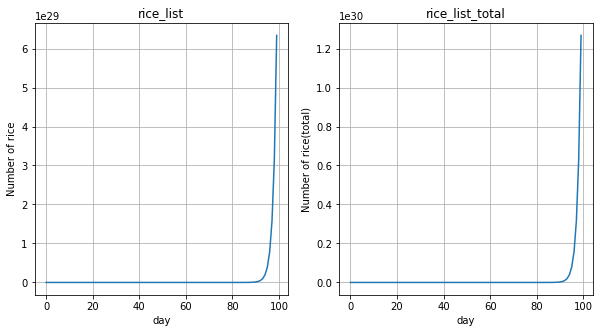

In [7]:
import matplotlib.pyplot as  plt

fig = plt.figure(figsize=(10, 5))
axes = fig.subplots(1, 2)

#『日毎の貰える米数のリスト』図形の設定
axes[0].plot(day, rice_list)
axes[0].set_title("rice_list")
axes[0].set_xlabel("day")
axes[0].set_ylabel("Number of rice")
axes[0].grid(True)

#『貰える米数の累計リスト』図形の設定
axes[1].plot(day, rice_list_total)
axes[1].set_title("rice_list_total")
axes[1].set_xlabel("day")
axes[1].set_ylabel("Number of rice(total)")
axes[1].grid(True)

## 【問題2】100日目以外の米粒の数

この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。
以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

### 2-1-1（解答）関数化

1-1-1で解答ずみ

### 2-2-1 （解答）課題2-1の関数でコース日数(123日間)を適用しよう。

In [4]:
rice_list_2, rice_list_total_2, day_2 = rice_math(days=123)
print(f"123日目の累計米数は、{rice_list_total_2[-1]}粒です。")

123日目の累計米数は、10633823966279326983230456482242756607粒です。


### 2-2-2（解答）「日毎の貰える米数」と「累計の米数」の推移グラフ

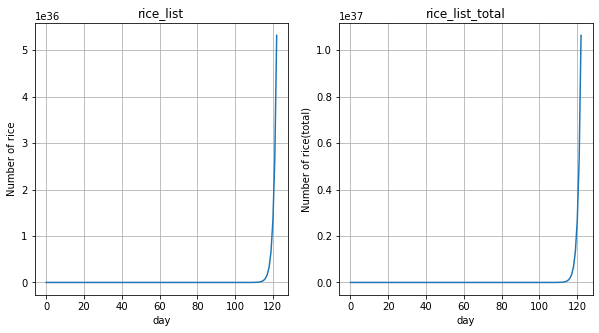

In [5]:
fig = plt.figure(figsize=(10, 5))
axes = fig.subplots(1, 2)

#『日毎の貰える米数のリスト』図形の設定
axes[0].plot(day_2, rice_list_2)
axes[0].set_title("rice_list")
axes[0].set_xlabel("day")
axes[0].set_ylabel("Number of rice")
axes[0].grid(True)

#『貰える米数の累計リスト』図形の設定
axes[1].plot(day_2, rice_list_total_2)
axes[1].set_title("rice_list_total")
axes[1].set_xlabel("day")
axes[1].set_ylabel("Number of rice(total)")
axes[1].grid(True)

## 【問題3】貰える米で何人が何日生活できるか

この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。
関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。
ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

### 3-1-1 （解答）１日に必要な米粒の数を検証



今回のすべての米の計算に関するデータは、  
炊飯器の大手メーカーTIGERのホームページ情報を参考にしました。  
https://www.tiger.jp/feature/ricecooker/curiosity/vol06.html

信頼に値する根拠としては、  
今回使用した情報以外にも様々なデータを扱っている点と、社会的信用度の高い企業であるので、信用の高い情報と思われます。
- 1合=6483粒  ※江戸時代より伝わる語呂合わせを参照。  
- 1合=約150g  
- 炊きあがり時には1.33倍に増える。

### 3-1-2 コース受講期間における受給米で何日生活できるか。

**補足事項**  
・コース受講期間は、10/1〜1/31までの123日とする。  
・受講人数はML2010期生の9人とする。  
・毎日３杯のご飯を食べるものとする。

In [ ]:
#rice_life関数は、引数(人数, ご飯の何杯/日, 日数)から、何日生活出来るかを戻り値として返します。
def rice_life(ninzu, nanbai, day): 
  rice_total = 0 #米の在庫数の初期値
  for i in range(day):
    y = 1 * 1 * (2**i)
    rice_total += y    # 米の在庫数(単位は粒)

  one_gou = 6483 # 1合は6483粒
  g = 150 * 1.33    # 1合は150g、但し炊きあがり時点では水分を吸い約1.33倍になる。
  rice_total_g = rice_total * g / one_gou
  #△米の在庫数(単位はg)  粒単位からg単位に変換する式
  one_cup = 180 #お茶碗１杯の消費g数
  syouhi = int(ninzu) * int(nanbai) * one_cup
  life_day = rice_total_g / syouhi
  #△何日生活出来るかを、米の在庫数(g)から人数、杯数、日数から算出する式
  return rice_total, rice_total_g, syouhi, life_day

# 標準入力
print("倍々になるお米があれば何人で、何日間生活出来るか計算するために、３つの質問にお答えください！！")
ninzu = int(input("何人家族ですか？             "))
nanbai = int(input("１日に何杯のご飯を食べますか？ "))
day = int(input("何日間で計算しますか？       "))

rice_total, rice_total_g, syouhi, life_day = rice_life(ninzu, nanbai, day)
print(f"{day}日間で貰えるの米粒は、{rice_total}粒で、{rice_total_g:.1f}gです。{ninzu}人で１日{nanbai}杯食べると1日にお米{syouhi}g消費するので、{life_day:.0f}日間生活していくことが出来ます。")

In [ ]:
#rice_life関数は、引数(人数, ご飯の何杯/日, 日数)から、何日生活出来るかを戻り値として返します。
def rice_life(ninzu, nanbai, day): 
  rice_total = 0 #米の在庫数の初期値
  for i in range(1, day+1):
    y = 1 * 2 ** (i-1)
    rice_total += y    # 米の在庫数(単位は粒)

  one_gou = 6483 # 1合は6483粒
  g = 150 * 1.33    # 1合は150g、但し炊きあがり時点では水分を吸い約1.33倍になる。
  rice_total_g = rice_total * g / one_gou
  #△米の在庫数(単位はg)  粒単位からg単位に変換する式
  one_cup = 180 #お茶碗１杯の消費g数
  syouhi = int(ninzu) * int(nanbai) * one_cup
  life_day = rice_total_g / syouhi
  #△何日生活出来るかを、米の在庫数(g)から人数、杯数、日数から算出する式
  return rice_total, rice_total_g, syouhi, life_day

# 標準入力
print("倍々になるお米があれば何人で、何日間生活出来るか計算するために、３つの質問にお答えください！！")
ninzu = int(input("何人家族ですか？             "))
nanbai = int(input("１日に何杯のご飯を食べますか？ "))
day = int(input("何日間で計算しますか？       "))

rice_total, rice_total_g, syouhi, life_day = rice_life(ninzu, nanbai, day)
print(f"{day}日間で貰えるの米粒は、{rice_total}粒で、{rice_total_g:.1f}gです。{ninzu}人で１日{nanbai}杯食べると1日にお米{syouhi}g消費するので、{life_day:.0f}日間生活していくことが出来ます。")